In [60]:
#import librarys

import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [9]:
#import data

df= pd.read_csv('MOVIES.csv.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [12]:
#check null cells

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [14]:
df.shape

(7668, 15)

In [16]:
df= df.dropna()

In [20]:
print(df.isnull().sum())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [22]:

df.sort_values(by=['gross'],inplace=False , ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0


In [24]:
 df = df.drop_duplicates()

In [26]:
#select only numeric values to see the corrlation matrix

df_numeric_values = df[['year','score','votes','budget','gross','runtime']]

In [28]:
#create corrletion matrix

corr_matrix = df_numeric_values.corr()
corr_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


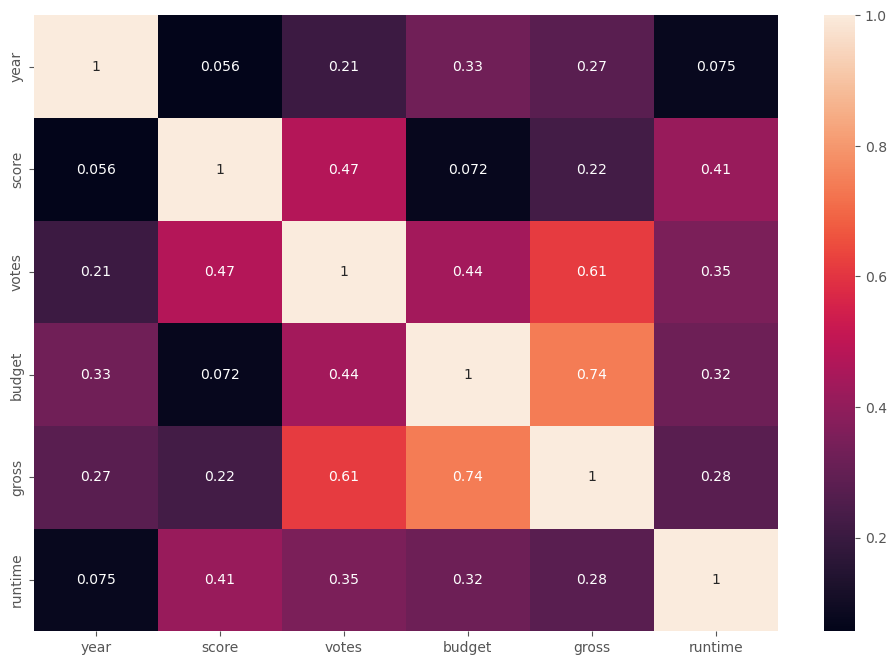

In [30]:
#heat map for better view
# corrletion shows strong relation between gross and budget 
#and moderate relation between votes and gross
sns.heatmap(corr_matrix,annot =True)
plt.show()

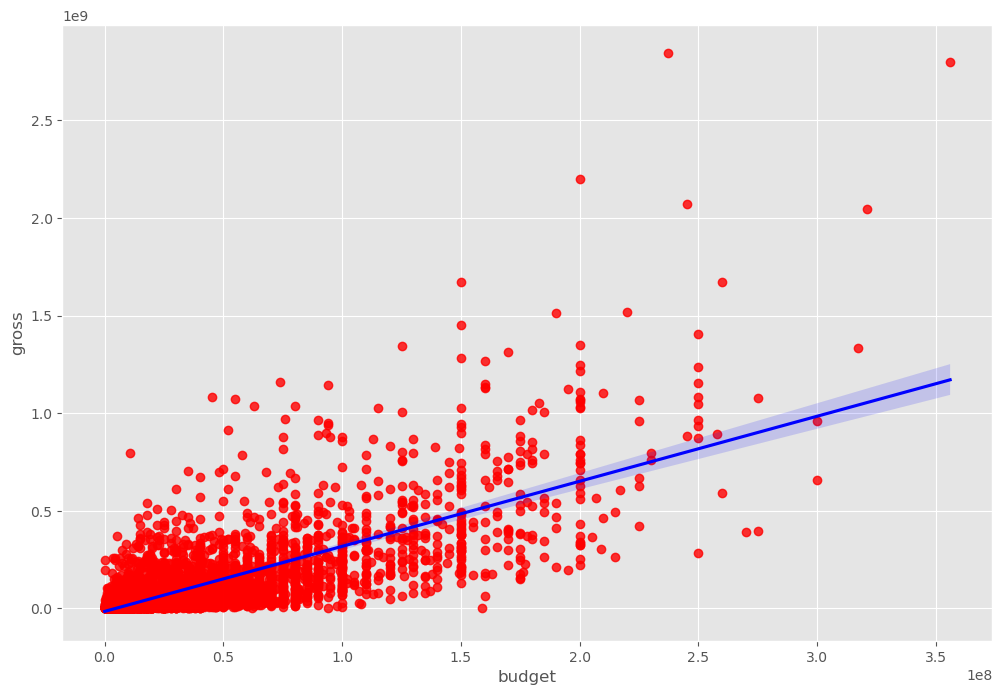

In [32]:
#scatter plot shows strong relation between budget and gross 


sns.regplot(x='budget', y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.show()

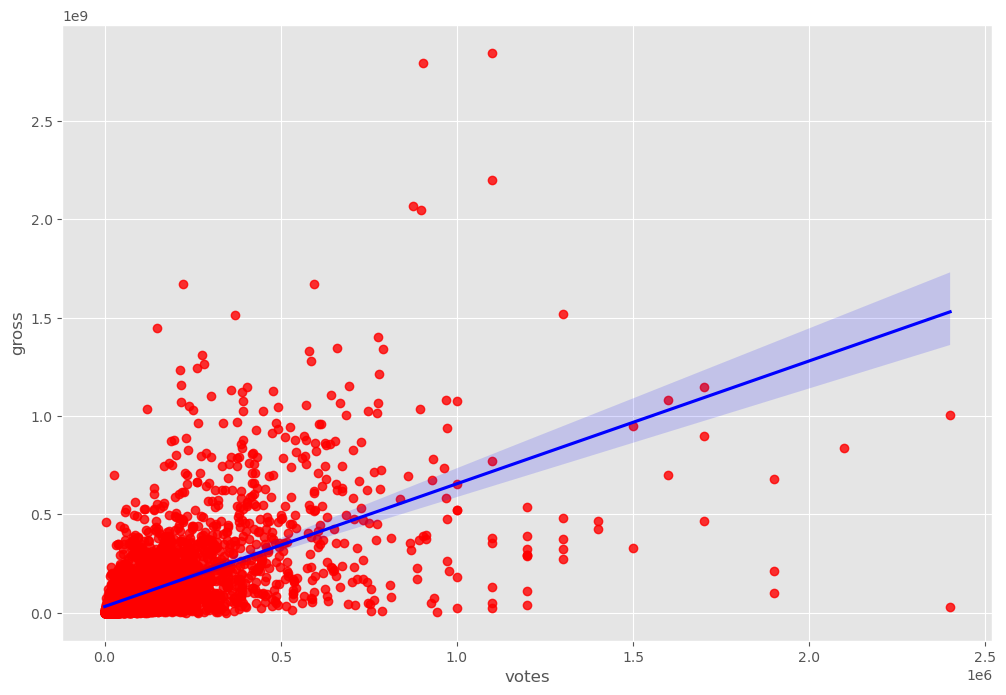

In [34]:
#scatter plot shows moderate relation between votes and gross

sns.regplot(x='votes', y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.show()

In [36]:
#lets build a model that predict the gross of the movies based on budget and votes 

In [42]:
#selecting votes and budget and gross for bulding the model
df_pred = df[['votes','budget','gross']] 
df_pred.head()

,votes,budget,gross
0,927000.0,19000000.0,46998772.0
1,65000.0,4500000.0,58853106.0
2,1200000.0,18000000.0,538375067.0
3,221000.0,3500000.0,83453539.0
4,108000.0,6000000.0,39846344.0


In [48]:
#spliting the data as x = independent values , y = dependent values
x = df_pred.iloc[:,0:2]
x

,votes,budget
0,927000.0,19000000.0
1,65000.0,4500000.0
2,1200000.0,18000000.0
3,221000.0,3500000.0
4,108000.0,6000000.0
...,...,...
7648,140000.0,90000000.0
7649,102000.0,85000000.0
7650,53000.0,175000000.0
7651,42000.0,135000000.0


In [56]:
y = df_pred.iloc[:,-1:]
y

,gross
0,46998772.0
1,58853106.0
2,538375067.0
3,83453539.0
4,39846344.0
...,...
7648,426505244.0
7649,319715683.0
7650,245487753.0
7651,111105497.0


In [67]:
#spliting the data to train = 80% and test = 20% 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)
x_train.shape

(4336, 2)

In [70]:
#training the model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [75]:
# lets test the model and give him some numbers for prediction 
#votes = 102000	, budget = 85000000
model.predict([[102000, 85000000]])

C:\Users\10\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.28844633e+08]])

In [79]:
# lets calculate the accuracy of the model
y_pred = model.predict(x_test)

In [82]:
error = y_pred - y_test
error

,gross
4169,7.801271e+07
3768,-1.884805e+07
4099,-2.237085e+07
3603,6.472573e+06
251,-4.002408e+07
...,...
1249,5.272262e+06
7405,-2.477648e+07
4897,3.946659e+07
5631,4.938395e+07


In [85]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test , y_pred)
r2

0.6511907166697022

In [ ]:
#65.5 consider kind of good score